# Tutorial Objective: SNR Per Pixel: calculation of Astronomical Star/Galaxy Spectra?

### Step-0: <span style="color:red">Obtain/Download FITS spectral data from SDSS Telescope </span>

### Step-1: <span style="color:violet"> Import Required library</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

### Step-2:  <span style="color:green">Read FITS Spectral file </span>


In [4]:
spectra_file=fits.open('spectra.fits')  # read fits file
# file information
spectra_file.info()

Filename: spectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3833R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  MYEXTENSIONHDU    1 ImageHDU        22   (1536, 557)   float32   


### Step-3:  <span style="color:blue">Extract Spectral data: Flux, Flux_err, and Wavelength</span>


In [6]:
data=spectra_file['COADD'].data
data

FITS_rec([(0.31876814, 3.5803, 0.06227958, 67108864, 68157440, 1.2102019 , 4.47     , 0.9922806 ),
          (1.1143087 , 3.5804, 0.15689911,        0,  1048576, 1.2100743 , 5.081951 , 1.0114235 ),
          (0.7961502 , 3.5805, 0.16475761,        0,  1048576, 1.2099053 , 5.0620394, 0.9356328 ),
          ...,
          (0.8616467 , 3.9633, 1.5347195 ,        0,        0, 0.67752814, 3.7603037, 0.8063698 ),
          (1.6965209 , 3.9634, 1.5423796 ,        0,        0, 0.67750573, 3.873718 , 0.79554725),
          (0.86358297, 3.9635, 1.5624636 ,        0,        0, 0.6774838 , 4.096436 , 0.81150657)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [9]:
flux=data['flux']
lam=10**data['loglam']
ivar=data['ivar']  # used to find error in flux
flux_err=np.sqrt(1/ivar)


array([4.007072  , 2.5245836 , 2.46364   , ..., 0.80720806, 0.8052011 ,
       0.8000093 ], dtype=float32)

### Step-4: <span style="color:magenta">Calcuate SNR= Flux/Flux_err</span>


In [11]:
SNR=flux/flux_err
SNR

array([0.07955139, 0.44138318, 0.32316014, ..., 1.0674406 , 2.1069531 ,
       1.0794661 ], dtype=float32)

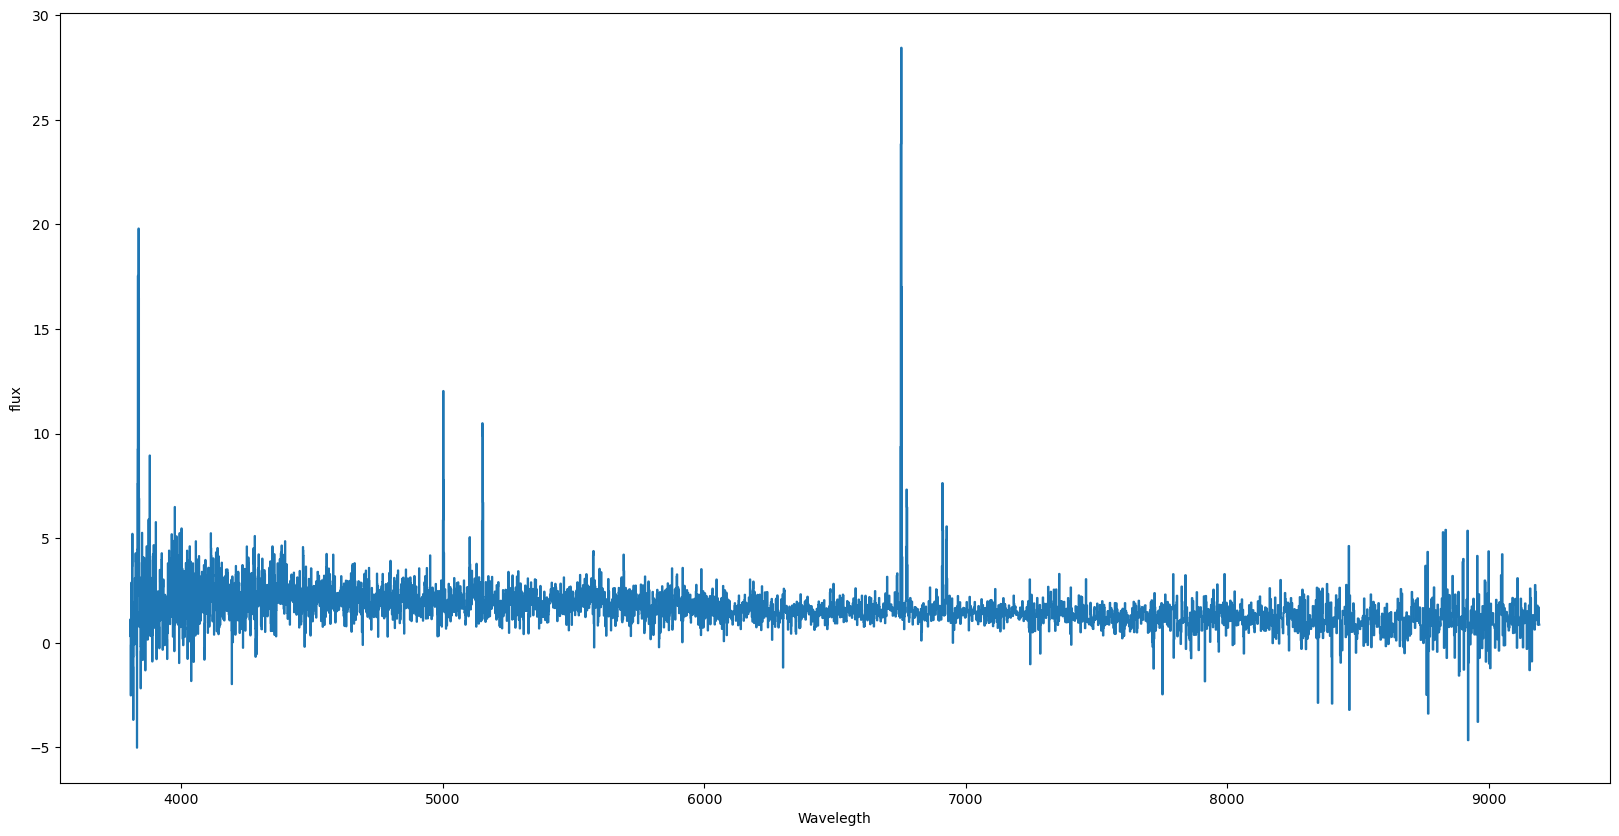

In [25]:
plt.figure(figsize=(20,10))
plt.step(lam,flux)
plt.xlabel('Wavelegth')
plt.ylabel('flux')
plt.show()

### Step-5:<span style="color:orange">Visualaize Spectral SNR Plot</span>


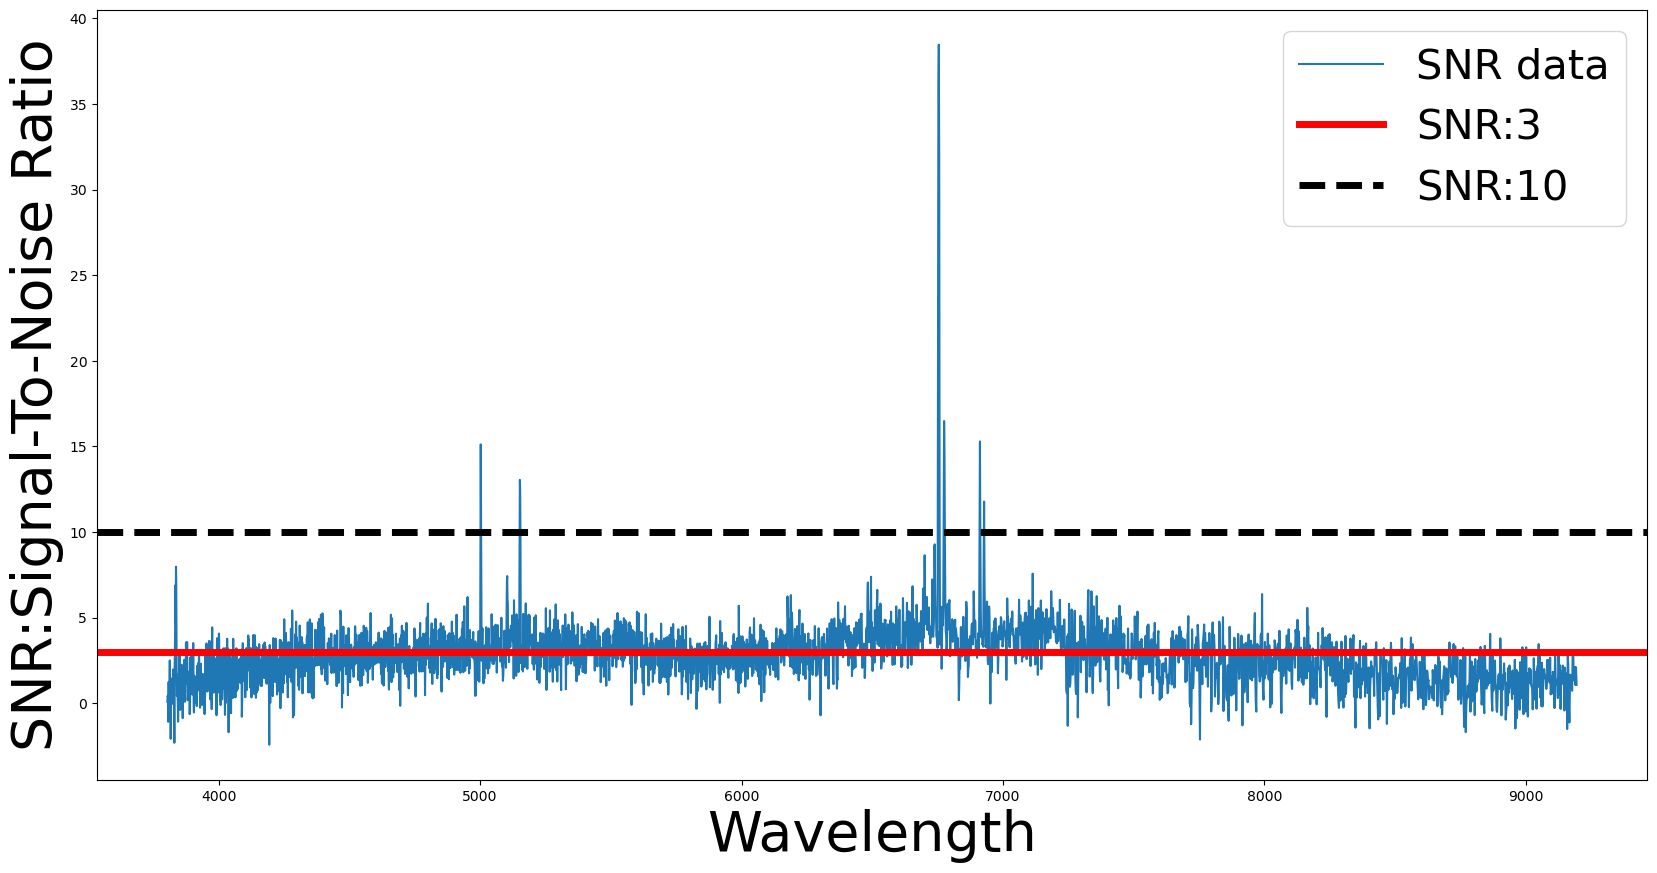

In [35]:
plt.figure(figsize=(20,10))
plt.plot(lam,SNR,label='SNR data')
plt.xlabel('Wavelength',fontsize=40)
plt.ylabel('SNR:Signal-To-Noise Ratio',fontsize=40)
plt.axhline(y=3,c='red',label='SNR:3',lw=5)
plt.axhline(y=10,c='k',label='SNR:10',lw=5,ls='--')
plt.legend(fontsize=30)
plt.savefig('sp.png',dpi=300)
plt.show()